# *Getting Started with pandas:* 
# Part 1) Introduction to pandas Data Structure

Pandas is a newer package built on top of NumPy, and provides an efficient implementation of a DataFrame. DataFrames are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data. As well as offering a convenient storage interface for labeled data, Pandas implements a number of powerful data operations familiar to users of both database frameworks and spreadsheet programs.

pandas will be a major tool of interest throughout much of the rest of the course. It contains data structures and data manipulation tools designed to make data cleaning and analysis fast and easy in Python. pandas is often used in tandem with numerical computing tools like NumPy and SciPy, analytical libraries like statsmodels and scikit-learn, and data visualization libraries like matplotlib. pandas adopts significant parts of NumPy’s idiomatic style of array-based computing, especially array-based functions and a preference for data processing without `for` loops.


While pandas adopts many coding idioms from NumPy, the biggest difference is that **pandas is designed for working with tabular or heterogeneous data. NumPy, by contrast, is best suited for working with homogeneous numerical array data.**

## Installing and Using Pandas

Installing Pandas on your system requires NumPy to be installed. Details on this installation can be found in
the Pandas documentationm (https://pandas.pydata.org/). If you followed the advice outlined in the preface and used the Anaconda stack, you already have Pandas installed.

First, let’s install the pandas library in your working environment. Execute the following command in your terminal:

In [1]:
pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 7.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Once Pandas is installed, you can import it and check the version:
#Now let’s import the libraries we’re going to need today:

import pandas
pandas.__version__

'2.2.3'

In [3]:
# Just as we generally import NumPy under the alias np, we will import Pandas under the alias pd:
import pandas as pd

#This import convention will be used throughout the remainder of this course.
#Thus, whenever you see pd. in code, it’s referring to pandas. 
#You may also find it easier to import Series and DataFrame into the local namespace since they are so frequently used:

In [4]:
import numpy as np

## 1.1 Introduction to pandas Data Structures


To get started with pandas, you will need to get comfortable with its two workhorse data structures: **Series and DataFrame**. While they are not a universal solution for every problem, they provide a solid, easy-to-use basis for most applications.

Data Structure refers to the specialized way of organizing, processing, and storing data to apply specific types of functionalities to them. 

Pandas has two main types of Data Structures based on their dependability 

- Series: 1D labeled array
- DataFrame: 2D labeled tabular structure


## Series

A Series is a one-dimensional array-like object containing a sequence of values (of similar types to NumPy types) and an associated array of data labels, called its index. The simplest Series is formed from only an array of data:

In [5]:
obj = pd.Series([4, 7, -5, 3])

In [6]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

As we see in the preceding output, the Series wraps both a sequence of values and a sequence of indices, which we can access with the values and index attributes. The values are simply a familiar NumPy array:

The string representation of a Series displayed interactively shows the index on the left and the values on the right. Since we did not specify an index for the data, a default one consisting of the integers 0 through N - 1 (where N is the length of the data) is created. You can get the array representation and index object of the Series via its values and index attributes, respectively:

In [7]:
obj.values

array([ 4,  7, -5,  3])

In [8]:
obj.index # like range(4)

RangeIndex(start=0, stop=4, step=1)

Like with a NumPy array, data can be accessed by the associated index via the familiar Python square-bracket notation:

In [9]:
obj[0]

np.int64(4)

In [10]:
obj[1:3]

1    7
2   -5
dtype: int64

**Series as generalized NumPy array**

From what we’ve seen so far, it may look like the Series object is basically interchangeable with a one-dimensional NumPy array. The essential difference is the presence of the index: while the NumPy array has an *implicitly defined* integer index used to access the values, the Pandas Series has an *explicitly defined* index associated with the values.

Often it will be desirable to create a Series with an index identifying each data point with a label:

This explicit index definition gives the `Series` object additional capabilities. For example, the index need not be an integer, but can consist of values of any desired type. For example, if we wish, we can use strings as an index:

In [11]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])

In [12]:
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [13]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

And the item access works as expected:

In [14]:
obj2['a']

np.int64(-5)

In [15]:
obj2['d'] = 6

In [16]:
#Here ['c', 'a', 'd'] is interpreted as a list of indices, even though it contains strings instead of integers.

obj2[['c', 'a', 'd']]

c    3
a   -5
d    6
dtype: int64

Using NumPy functions or NumPy-like operations, such as filtering with a boolean array, scalar multiplication, or applying math functions, will preserve the index-value link:

In [17]:
obj2[obj2 > 0]

d    6
b    7
c    3
dtype: int64

In [18]:
obj2 * 2

d    12
b    14
a   -10
c     6
dtype: int64

In [19]:
np.exp(obj2)

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

Another way to think about a Series is as a fixed-length, ordered dict, as it is a mapping of index values to data values. It can be used in many contexts where you might use a dict:

In [20]:
'b' in obj2

True

In [21]:
'e' in obj2

False

**Series as specialized dictionary**

In this way, you can think of a Pandas `Series` a bit like a specialization of a Python dictionary. A dictionary is a structure that maps arbitrary keys to a set of arbitrary values, and a `Series` is a structure that maps typed keys to a set of typed values. This typing is important: just as the type-specific compiled code behind a NumPy array makes it more efficient than a Python list for certain operations, the type information of a Pandas `Series` makes it much more efficient than Python dictionaries for certain operations.

We can make the `Series`-as-dictionary analogy even more clear by constructing a `Series` object directly from a Python dictionary:

Should you have data contained in a Python dict, you can create a Series from it by passing the dict:

In [22]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

In [23]:
obj3 = pd.Series(sdata)

In [24]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

By default, a Series will be created where the index is drawn from the sorted keys.
From here, typical dictionary-style item access can be performed:

In [25]:
obj3['Texas']

np.int64(71000)

Unlike a dictionary, though, the Series also supports array-style operations such as
slicing:

In [26]:
obj3['Texas':'Utah']

Texas     71000
Oregon    16000
Utah       5000
dtype: int64

When you are only passing a dict, the index in the resulting Series will have the dict’s keys in sorted order. You can override this by passing the dict keys in the order you want them to appear in the resulting Series:

In [27]:
states = ['California', 'Ohio', 'Oregon', 'Texas']

In [28]:
obj4 = pd.Series(sdata, index=states)

In [29]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

Here, three values found in `sdata` were placed in the appropriate locations, but since no value for `'California'` was found, it appears as `NaN` (not a number), which is con‐ sidered in pandas to mark missing or *NA values*. Since `'Utah'` was not included in states, it is excluded from the resulting object.


We will use the terms “missing” or “NA” interchangeably to refer to missing data. The `isnull` and `notnull` functions in pandas should be used to detect missing data:

In [30]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [31]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

Series also has these as instance methods:

In [33]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

A useful Series feature for many applications is that it automatically aligns by index
label in arithmetic operations: 

Data alignment features will be addressed in more detail later. If you have experience with databases, you can think about this as being similar to a join operation.

In [34]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [35]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [36]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64


Both the Series object itself and its index have a `name` attribute, which integrates with other key areas of pandas functionality:

In [37]:
obj4.name = 'population'

In [40]:
obj4.index.name = 'state'

In [41]:
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

A Series’s index can be altered in-place by assignment:

In [42]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [43]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Tom']

In [44]:
obj

Bob      4
Steve    7
Jeff    -5
Tom      3
dtype: int64

## DataFrame

The next fundamental structure in Pandas is the `DataFrame`. A `DataFrame` represents a rectangular table of data and contains an ordered collection of columns, each of which can be a different value type (numeric, string, boolean, etc.). The DataFrame has both a row and column index; it can be thought of as a dict of Series all sharing the same index. Under the hood, the data is stored as one or more two-dimensional blocks rather than a list, dict, or some other collection of one-dimensional arrays. 



If a `Series` is an analog of a one-dimensional array with flexible indices, a `DataFrame` is an analog of a two-dimensional array with both flexible row indices and flexible column names. Just as you might think of a two-dimensional array as an ordered sequence of aligned one-dimensional columns, you can think of a `DataFrame` as a sequence of aligned `Series` objects. Here, by “aligned” we mean that they share the same index. 

To demonstrate this, let’s first construct a new `Series` from a dict of equal-length lists or NumPy arrays

In [47]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [48]:
frame = pd.DataFrame(data)

The `pd.DataFrame` is a core component in the pandas library. A DataFrame is a two-dimensional, size-mutable, and potentially heterogeneous tabular data structure. In simpler terms, it can be visualized as a spreadsheet or SQL table, or a dictionary where each item (which can be of different data types) represents a column

The `frame = pd.DataFrame(data)` creates a DataFrame named `frame` using the dictionary `data`. The keys of the dictionary become the column labels of the DataFrame, and the corresponding lists become the data for those columns.

The resulting DataFrame will have its index assigned automatically as with Series, and
the columns are placed in sorted order:

In [49]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


#### Basic Operations

Here are a few basic operations you can perform on a DataFrame:

- Viewing the top rows: `.head()`
- Viewing the bottom rows: `.tail()`
- Describing the data: `.describe()`

For large DataFrames, the `head` method selects only the first five rows:

In [50]:
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [51]:
frame.tail(2)

,state,year,pop
4,Nevada,2002,2.9
5,Nevada,2003,3.2


The method `tail(n)` returns the last n rows of the DataFrame. When used on the frame DataFrame, `frame.tail(2)` will return the last two rows of the DataFrame.

If you specify a sequence of columns, the DataFrame’s columns will be arranged in that order:

If you pass a column that isn’t contained in the dict, it will appear with missing values in the result:

In [52]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [53]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four',
                           'five', 'six'])

In [54]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


Like the Series object, the DataFrame has an index attribute that gives access to the index labels:

In [55]:
frame2.index

Index(['one', 'two', 'three', 'four', 'five', 'six'], dtype='object')

Additionally, the DataFrame has a columns attribute, which is an Index object holding
the column labels:

In [56]:
# get column names in Pandas dataframe
frame2.columns

#frame2[column] works for any column name, 
#but frame2.column only works when the column name is a valid Python variable name.

Index(['year', 'state', 'pop', 'debt'], dtype='object')

A column in a DataFrame can be retrieved as a Series either by dict-like notation or by attribute:

In [57]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [58]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

Rows can also be retrieved by position or name with the special loc attribute (much more on this later):

In [59]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

Columns can be modified by assignment. For example, the empty `'debt'` column could be assigned a scalar value or an array of values:

In [60]:
frame2['debt'] = 16.5

In [61]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [62]:
frame2['debt'] = np.arange(6.)

In [63]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


When you are assigning lists or arrays to a column, the value’s length must match the length of the DataFrame. If you assign a Series, its labels will be realigned exactly to the DataFrame’s index, inserting missing values in any holes:

In [64]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])

In [65]:
val

two    -1.2
four   -1.5
five   -1.7
dtype: float64

In [66]:
frame2['debt'] = val

In [67]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


Assigning a column that doesn’t exist will create a new column. The `del` keyword will delete columns as with a dict.

As an example of `del`, we first add a new column of boolean values where the state column equals `'Ohio'`:

In [68]:
frame2['eastern'] = frame2.state == 'Ohio' 

#New columns cannot be created with the frame2.eastern syntax.

In [71]:
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


The `del` method can then be used to remove this column:

In [72]:
del frame2['eastern']

In [73]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [74]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


Another common form of data is a nested dict of dicts:

In [75]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}} 

If the nested dict is passed to the DataFrame, pandas will interpret the outer dict keys as the columns and the inner keys as the row indices:

In [76]:
frame3 = pd.DataFrame(pop)

In [77]:
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


You can **transpose** the DataFrame (swap rows and columns) with similar syntax to a NumPy array:

In [78]:
frame3.T

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


The keys in the inner dicts are combined and sorted to form the index in the result. This isn’t true if an explicit index is specified:

In [79]:
pd.DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


`Dicts of Series` are treated in much the same way:

In [80]:
pdata = {'Ohio': frame3['Ohio'][:-1],
         'Nevada': frame3['Nevada'][:2]}


In [81]:
pdata

{'Ohio': 2001    1.7
 2002    3.6
 Name: Ohio, dtype: float64,
 'Nevada': 2001    2.4
 2002    2.9
 Name: Nevada, dtype: float64}

If a `DataFrame`’s `index` and `columns` have their `name` attributes set, these will also be displayed:

In [82]:
frame3.index.name = 'year'; frame3.columns.name = 'state'

In [83]:
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


As with Series, the `values` attribute returns the data contained in the DataFrame as a two-dimensional ndarray:

In [84]:
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

If the DataFrame’s columns are different dtypes, the dtype of the values array will be chosen to accommodate all of the columns:

In [85]:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

For a complete list of things you can pass the DataFrame constructor, see Table 5-1.

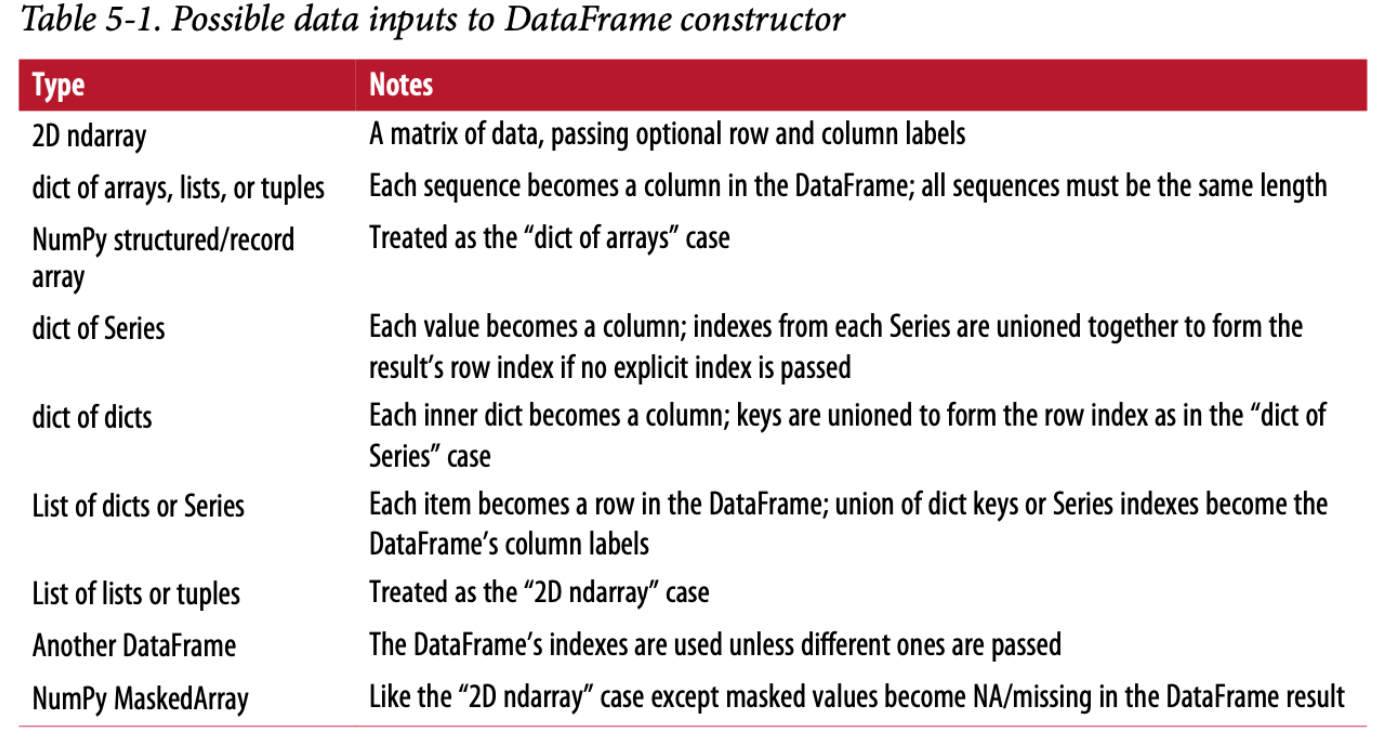

## Index Objects 

pandas’s Index objects are responsible for holding the axis labels and other metadata (like the axis name or names). Any array or other sequence of labels you use when constructing a `Series` or `DataFrame` is internally converted to an Index:

In [86]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])

In [87]:
obj

a    0
b    1
c    2
dtype: int64

In [88]:
index = obj.index

In [89]:
index[1:]

Index(['b', 'c'], dtype='object')

Index objects are immutable and thus can’t be modified by the user:

In [90]:
index[1] = 'd'

TypeError: Index does not support mutable operations

Immutability makes it safer to share Index objects among data structures:

In [91]:
labels = pd.Index(np.arange(3))

In [92]:
labels 

Index([0, 1, 2], dtype='int64')